### 1.
(a) 
The primary type of problem addressed is categorical outcome prediction, where the goal is to assign a label (class) to an instance based on its features. These problems often involve structured data and a finite set of discrete classes.
Medical Diagnosis
Classifying whether a patient has a disease (e.g., diabetes, cancer) based on symptoms, lab results, or genetic data.
Customer Segmentation
Categorizing customers into groups (e.g., high-value, churn risk) based on purchase history, demographic data, and engagement metrics.
Fraud Detection
Identifying fraudulent transactions or activities in banking or e-commerce based on transaction patterns, locations, and amounts.
Loan Approval
Determining whether a loan applicant is likely to default or repay based on credit history, income, and other financial data.
(b)
A Classification Decision Tree is a type of supervised machine learning algorithm used to solve classification problems. It predicts the class or category to which an input data point belongs by splitting the data into subsets based on feature values. The splits are determined by decision rules that maximize class purity at each node. 
For a Classification Decision Tree, it uses a tree-like structure where the data is split into subsets at each node based on decision rules derived from the features. Multiple Linear Regression (MLR) is to model the relationship between one dependent variable (y) and two or more independent variables. Classification Decision Tree can naturally handle nonlinearity by creating splits that capture nonlinear relationships between features and classes.
However, Multiple Linear Regression assumes a linear relationship between features and the target variable.

summary: https://chatgpt.com/share/673dfdf9-dce8-8008-9aea-292201aa75df

### 2.
1. Accuracy:
Scenarios where all outcomes are equally important, and there is a balanced dataset or where false positives and false negatives have roughly equal costs.
Weather Prediction: Forecasting whether it will rain or not, where both correct predictions are equally valuable.
Loan Default Prediction: If the goal is to classify applicants without favoring either "default" or "no default" outcomes and the data is balanced.

2. Sensitivity
Scenarios where identifying all true positives is critical, and false negatives are costly or where missing a positive case has significant consequences.
Medical Diagnosis: Detecting diseases like cancer, where failing to identify a patient who has the disease (false negative) can have severe consequences.
Fraud Detection: Identifying fraudulent transactions, where missing a fraudulent case is more problematic than flagging a legitimate transaction.

3.Specificity
Scenarios where avoiding false positives is important or where predicting a positive incorrectly leads to significant costs or inconvenience.
Spam Filtering: Avoiding false positives (marking legitimate emails as spam) is crucial to ensure important emails aren't lost.
Legal Systems: Predicting recidivism risk, where labeling a low-risk individual as high-risk (false positive) might unjustly penalize them.

4.  Precisions
Scenarios where minimizing false positives is critical or where acting on incorrect positive predictions is costly or undesirable.
Online Advertising: Identifying users likely to click on ads, where showing ads to uninterested users (false positives) wastes resources.
Criminal Investigation: Identifying suspects in a crime, where accusing innocent individuals (false positives) can have legal and ethical implications.

chat summary: https://chatgpt.com/share/673dfdf9-dce8-8008-9aea-292201aa75df

In [3]:
### 3. 
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

ab_reduced_noNaN = ab_reduced.dropna()

ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

print("Dataset Information:")
print(ab_reduced_noNaN.info())
print("\nSummary Statistics:")
print(ab_reduced_noNaN.describe())
print("\nCategorical Column Summary:")
print(ab_reduced_noNaN['Hard_or_Paper'].value_counts())
print(ab_reduced_noNaN.describe())
print("\nNumber of remaining NaN values:", ab_reduced_noNaN.isna().sum().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None

Summary Statistics:
       List Price  Amazon Price    NumPages     Pub year       Thick
count  319.000000    319.000000  319.000000   319.000000  319.000000
mean    18.362978     12.941034  334.272727  2002.175549    0.903448
std     13.976755     12.43667

/tmp/ipykernel_52/2698090236.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
/tmp/ipykernel_52/2698090236.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_52/2698090236.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

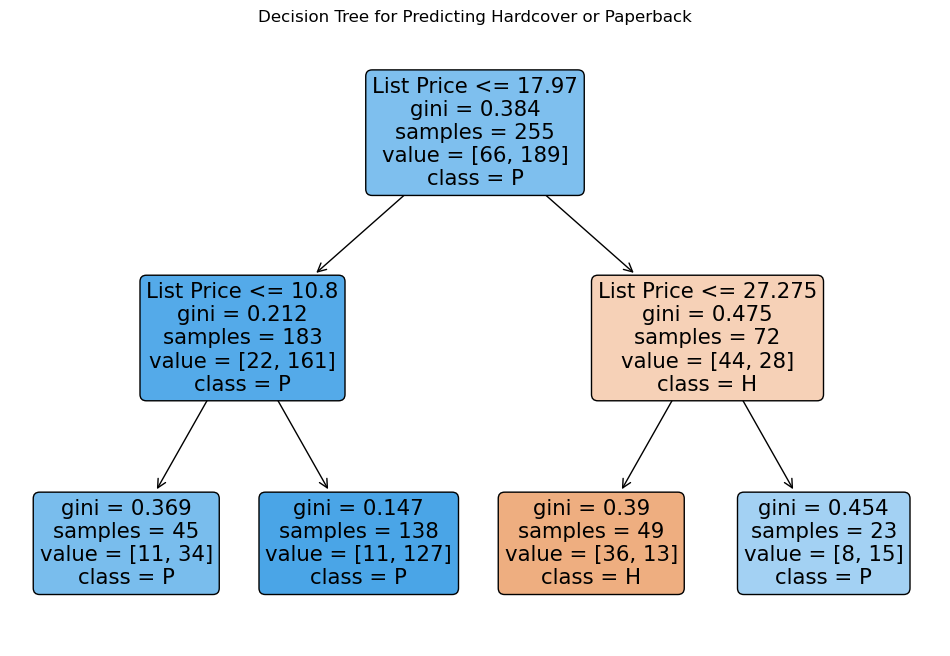

In [7]:
### 4.

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

X = ab_reduced_noNaN_train[['List Price']] 
y = ab_reduced_noNaN_train['Hard_or_Paper'] 
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

clf.fit(X, y)

plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=['List Price'],
    class_names=clf.classes_,
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Predicting Hardcover or Paperback")
plt.show()

#Chat summary: https://chatgpt.com/share/673e03bf-ce2c-8008-817c-ad71bf9c3df5

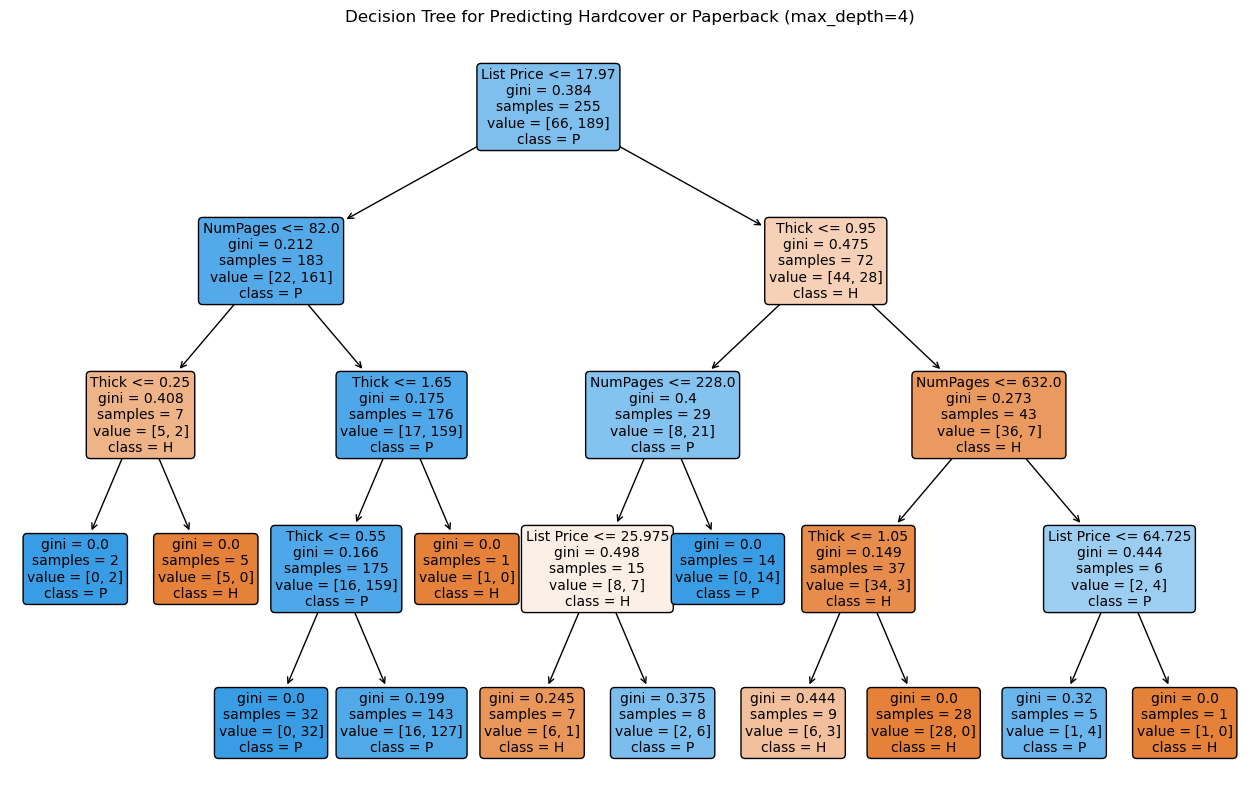

In [6]:
### 5. 

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

X = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']] 
y = ab_reduced_noNaN_train['Hard_or_Paper'] 

clf = DecisionTreeClassifier(max_depth=4, random_state=42)

clf.fit(X, y)

plt.figure(figsize=(16, 10))
tree.plot_tree(
    clf,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Predicting Hardcover or Paperback (max_depth=4)")
plt.show()


The decision tree makes predictions by splitting the feature space recursively based on feature values, following paths until it reaches a leaf node where the class label is assigned based on the majority class in that region of the feature space.

Chat summary: https://chatgpt.com/share/673e03bf-ce2c-8008-817c-ad71bf9c3df5

In [15]:
### 6.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']] 
y_train = ab_reduced_noNaN_train['Hard_or_Paper'] 
clf = DecisionTreeClassifier(max_depth=4, random_state=42) 
clf.fit(X_train, y_train) 

X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']] 
y_true = ab_reduced_noNaN_test['Hard_or_Paper'] 
y_pred_clf = clf.predict(X_test)

cm_clf = confusion_matrix(y_true, y_pred_clf)

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)  
clf2.fit(X_train, y_train)
y_pred_clf2 = clf2.predict(X_test) 
cm_clf2 = confusion_matrix(y_true, y_pred_clf2)

def calculate_metrics(cm):
    # Sensitivity (Recall) = TP / (TP + FN)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    # Specificity = TN / (TN + FP)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    # Accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
    return sensitivity, specificity, accuracy

sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

print("Model 1 (clf) - Sensitivity: {:.3f}, Specificity: {:.3f}, Accuracy: {:.3f}".format(sensitivity_clf, specificity_clf, accuracy_clf))
print("Model 2 (clf2) - Sensitivity: {:.3f}, Specificity: {:.3f}, Accuracy: {:.3f}".format(sensitivity_clf2, specificity_clf2, accuracy_clf2))

# chat summary: https://chatgpt.com/share/673e03bf-ce2c-8008-817c-ad71bf9c3df5

Model 1 (clf) - Sensitivity: 0.909, Specificity: 0.750, Accuracy: 0.859
Model 2 (clf2) - Sensitivity: 0.909, Specificity: 0.750, Accuracy: 0.859


### 7.
The differences between the two confusion matrices arise from the features used in the prediction. The first confusion matrix uses only `List Price` as the feature for predicting the book type, while the second confusion matrix uses three features: `NumPages`, `Thick`, and `List Price`. The first model may perform worse because `List Price` alone might not contain enough information to accurately classify the book type, leading to more misclassifications. In contrast, the second model, with additional features, provides more context for the classifier, likely leading to better performance as it can leverage multiple variables to make predictions.

The confusion matrices for `clf` and `clf2` are considered better because they likely use a more appropriate set of features for classification. By including more informative variables, these models are better able to distinguish between the categories, which typically results in higher accuracy and more balanced predictions (fewer false positives and false negatives).
chat summary: https://chatgpt.com/share/673e03bf-ce2c-8008-817c-ad71bf9c3df5

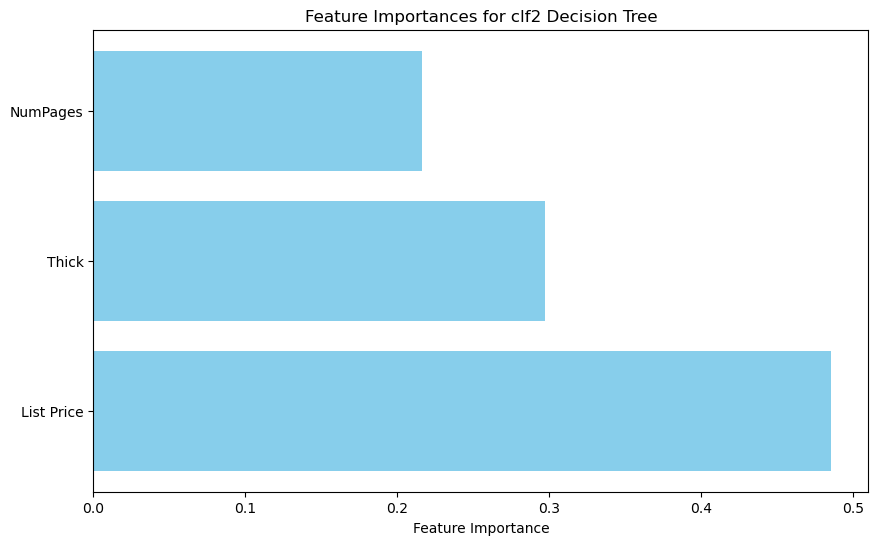

In [17]:
### 8.
import matplotlib.pyplot as plt

feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importances for clf2 Decision Tree')
plt.gca().invert_yaxis()
plt.show()

most_important_feature = feature_names[feature_importances.argmax()]

# chat summary: https://chatgpt.com/share/673e03bf-ce2c-8008-817c-ad71bf9c3df5


The most important predictor variable for clf2 is: List Price.

### 9.
The key difference in interpreting predictor variables in linear regression versus binary decision trees lies in the nature of the relationships and how feature importance is assessed. In linear regression, the coefficients provide a direct and quantitative measure of how each predictor variable influences the target variable, with positive or negative signs indicating the direction of the relationship, and the magnitude reflecting the strength of the effect. The relationship between the predictors and the outcome is assumed to be linear.

In binary decision trees,feature importance quantifies the contribution of each feature in reducing the model's prediction error, but it does so in a more complex, non-linear way. The importance values reflect how much each feature helps in making decisions at various points in the tree. Unlike linear regression, feature importance in decision trees doesn't indicate a specific direction of the effect; rather, it shows which features are most useful in partitioning the data to make accurate predictions.
chat summary:  https://chatgpt.com/share/673e03bf-ce2c-8008-817c-ad71bf9c3df5

In [ ]:
### 10.Somewhat